In [1]:
# ======================================================
# Main script for modularity
# ======================================================
from utils.utils import *

from preprocessing.load_dataset import load_and_clean_dataset
from preprocessing.embeddings import encode
from preprocessing.data_imputation import missing_values


from feature_selection.correlation_filter import correlation_filter
from feature_selection.correlation_threshold import compute_adaptive_correlation_threshold
from feature_selection.pca import apply_pca


from clustering.fuzzy_cmeans import fuzzy_cmeans

from model.testing import evaluate_anfis
from model.tsk_cv import tsk_cross_validation
from model.utils import *

In [2]:
# ======================================================
# 1. Load and preprocess dataset
# ======================================================
df = load_and_clean_dataset('../data/raw/dataset.xlsx')
df = encode(df)
df = missing_values(df)

# Check if there are missing values
print("Any missing values? ", df.isnull().values.any())

target_cols = ["OBITO", "Dias_ate_morte_log_10", "Recov", "RecovTime_log_10"]
y = df['OBITO']               # target vector
X = df.drop(columns=target_cols)   # all other columns as features, 
                                   # except the ones that leak data to the target

Continuous variables: ['IDADE', 'PESO', 'ALT', 'BSA', 'DIA', 'Dias_internamento_UCI', 'Dias_Internamento_hospitalar', 'APACHE', 'SAPSII', 'SOFA_adm', 'SOFA_max', 'delta_SOFA', 'LINFOCITOS', 'LEUCOCITOS', 'PCR', 'PCT', 'VS', 'FERRITINA', 'Hb', 'INR', 'aPTT', 'CD4_CD8', 'DDIMEROS', 'FIBRINOGENEO', 'PLAQUETAS', 'CREAT', 'UREIA', 'Na', 'K', 'Mg ', 'Fosf', 'Calcio', 'Prot_T', 'Albumina', 'CK', 'AST', 'ALT.1', 'BILIRUB', 'FA', 'LDH', 'DIAS VM', 'P_F', 'PAs', 'PAd', 'PAm', 'FC', 'PVC', 'BH', 'DU', 'Lact', 'Scv_O2', 'gap_CO2', 'IC', 'SV', 'TFC', 'SVV', 'PPV', 'IPVR', 'ISVR', 'pH', 'pCO2', 'pO2', 'HCO3', 'Nora', '2o_vasopressor', 'INOTROP', 'TROPONINA', 'NTproBNP', 'Recov', 'IVS', 'LVPW', 'LVEDD', 'LVESD', 'LVShF', 'EF_Teich', 'LVEF', 'LVESV', 'LVEDV', 'LVSV', 'GLS_VE', 'GWI', 'GWE', 'HR', 'CO', 'IC.1', 'LVOT_VTI', 'ET', 'SV_Dopp', 'CO.1', 'IC.2', 'LV-FE_VTI', 'LV-GLS_VTI', 'S', 'E_VE', 'A_VE', 'E/A', 'TdesVE', 'e_lat', 'e_sep', 'E/e', 'LAV_max', 'LAVi', 'LAV_min', 'LAV_preA', 'LA_R', 'LA_CD', 

c:\Users\afons\anaconda3\envs\torch_env\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Any missing values?  False


c:\Users\afons\Documents\SI\SI_Project\code\preprocessing\data_imputation.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col_const_dias}_log_{base}'] = func(df[col_const_dias])
c:\Users\afons\Documents\SI\SI_Project\code\preprocessing\data_imputation.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col_const_recov}_log_{base}'] = func(df[col_const_recov])


In [3]:
# ======================================================
# 2. Feature selection
# ======================================================
threshold, _, _ = compute_adaptive_correlation_threshold(X, k=2)
X, dropped_features = correlation_filter(X, threshold=threshold)
print(f"Dropped features due to high correlation: {dropped_features}")

Mean correlation: 0.119
Std deviation: 0.113
Adaptive threshold (k=2): 0.346
Dropped features due to high correlation: ['RV_FAC/VTI', 'DU', 'DysVE_D', 'Indice_resistencia', 'Vporta_pulsátil ligeiro', 'tNd', 'DDIMEROS', 'LVShF', 'RA_R', 'S_VD', 'LVESV', 'FC', 'VTI_RVOT', 'pre_TE', 'CO', 'INR', 'Hb', 'DysVE_D_classic', 'PCR', 'IVCT', 'End(Avg)', 'HR', 'FIBRINOGENEO', 'DysVE_D_simplified', 'E_VE', 'End(Est)', 'DysVD_S_TAPSE', 'TSR', 'LA_CT', 'LVEDV', 'e_sep', 'AST', 'RA_Vi', 'DysVD_S_strain', 'EF_Teich', 'RV_FAC', 'LAV_min', 'S', 'SAPSII', 'IDADE', 'DysVD_S', 'pCO2', 'BH', 'PAs', 'Vrenais_CONTINUO', 'AV_DECOUP', 'LVESD', 'LA_R', 'TE', 'LEUCOCITOS', 'e_lat', 'GWE', 'PVmin', 'FERRITINA', 'A_VE', 'PCT', 'CK', 'SV_Dopp', 'RV_GLS', 'LVOT_VTI', 'LDH', 'BSA', 'IVRT', 'LAV_preA', 'RA_CT', 'CREAT', 'DysVE_S', 'LV-FE_VTI', 'PPV', 'pH', 'P_F', 'DysVD_D', 'DRC', 'Dys_VD_D_strain', 'SOFA_adm', 'Nora', 'IC', 'LVEF', 'APACHE', 'IC.2', 'Vporta _Continuo', 'Vrenais S<D', 'emb_2', 'Microbiologia_+', 'PVC',

Original feature count: 68
Reduced to 5 principal components
Explained variance ratios: [0.0502 0.0472 0.0455 0.0422 0.0386]
Cumulative variance: [0.0502 0.0974 0.1429 0.1851 0.2237]

Top 1 features for PC1:
  BILIRUB                   | loading = 0.2818

Top 1 features for PC2:
  e_VD                      | loading = 0.3432

Top 1 features for PC3:
  Calcio                    | loading = 0.2765

Top 1 features for PC4:
  delta_SOFA                | loading = 0.2914

Top 1 features for PC5:
  OBESIDADE                 | loading = 0.3215


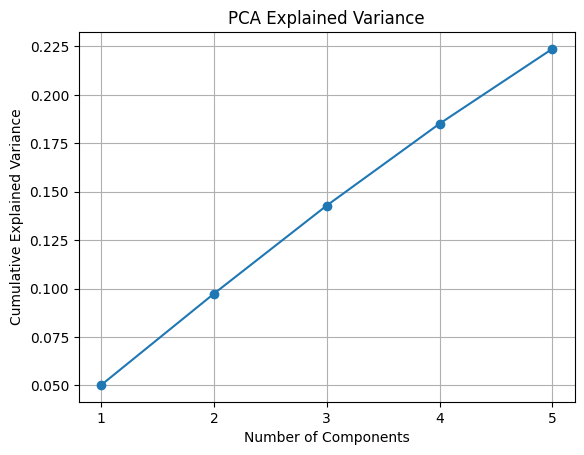

In [ ]:
# ======================================================
# 3. PCA
# ======================================================

X, loadings, explained_variance_ratio = apply_pca(X, n_components=20 , n_top_features=1, plot=True)

Training feature shape: (79, 5)
Fuzzy partition coefficient (FPC): 0.5000079040713161


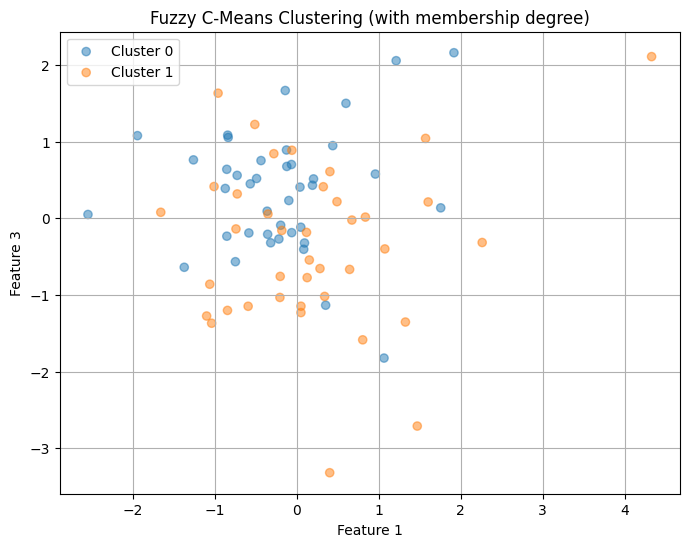

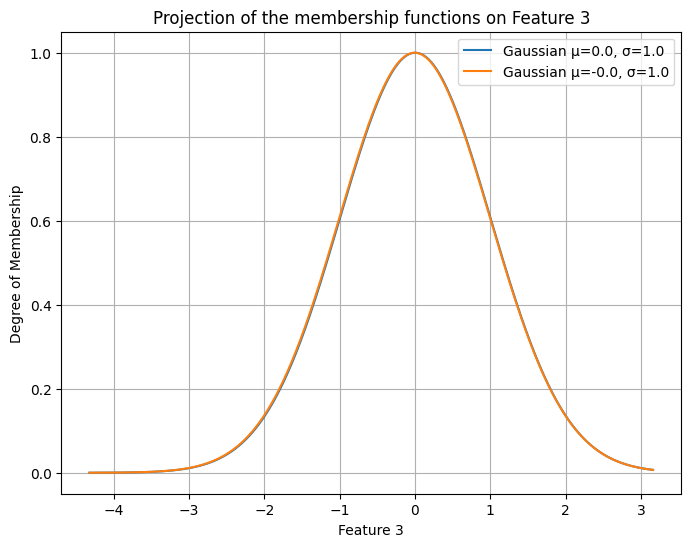

m=1.85, n_clusters=2, CV Accuracy=0.6079
m=1.85, n_clusters=3, CV Accuracy=0.4566
m=1.85, n_clusters=4, CV Accuracy=0.5967
m=1.85, n_clusters=5, CV Accuracy=0.5342
m=1.90, n_clusters=2, CV Accuracy=0.6079
m=1.90, n_clusters=3, CV Accuracy=0.5447
m=1.90, n_clusters=4, CV Accuracy=0.5717
m=1.90, n_clusters=5, CV Accuracy=0.6211
m=1.95, n_clusters=2, CV Accuracy=0.6072
m=1.95, n_clusters=3, CV Accuracy=0.5454
m=1.95, n_clusters=4, CV Accuracy=0.5967
m=1.95, n_clusters=5, CV Accuracy=0.5211
m=2.00, n_clusters=2, CV Accuracy=0.6197
m=2.00, n_clusters=3, CV Accuracy=0.5316
m=2.00, n_clusters=4, CV Accuracy=0.5053
m=2.00, n_clusters=5, CV Accuracy=0.5197
m=2.05, n_clusters=2, CV Accuracy=0.6197
m=2.05, n_clusters=3, CV Accuracy=0.5309
m=2.05, n_clusters=4, CV Accuracy=0.5691
m=2.05, n_clusters=5, CV Accuracy=0.5954
m=2.10, n_clusters=2, CV Accuracy=0.5947
m=2.10, n_clusters=3, CV Accuracy=0.6079
m=2.10, n_clusters=4, CV Accuracy=0.5191
m=2.10, n_clusters=5, CV Accuracy=0.5579

Best parameters

In [5]:
# ======================================================
# 4. Tune fuzzy parameters with K-Fold CV
# ======================================================

# initialize hyperparameters
n_clusters = 2
m = 2

Xtr, Xte, ytr, yte, centers, u, fpc, sigmas, cluster_labels = fuzzy_cmeans(X, y, test_size=0.2, 
                                                                        n_clusters=n_clusters, m=m)

# ======================================================
# 4. Tune fuzzy parameters with K-Fold CV (directly)
# ======================================================


# Hyperparameter ranges
m_values = np.arange(1.85, 2.15, 0.05)
n_clusters_values = np.arange(2, 6, 1)

best_params = None
best_acc = 0.0

kf = KFold(n_splits=4, shuffle=True, random_state=42)

for m in m_values:
    for n_clusters in n_clusters_values:
        fold_accs = []

        for train_idx, val_idx in kf.split(Xtr):
            # Split fold data
            Xtrain_fold, Xval_fold = Xtr[train_idx], Xtr[val_idx]
            ytrain_fold, yval_fold = ytr[train_idx], ytr[val_idx]

            # --- Fuzzy C-means ---
            Xtrain_np = Xtrain_fold.T  # shape: features x samples
            centers, u, _, _, _, _, _ = fuzz.cluster.cmeans(
                data=Xtrain_np,
                c=n_clusters,
                m=m,
                error=0.005,
                maxiter=1000
            )

            # --- Compute sigmas ---
            sigmas = []
            for j in range(n_clusters):
                u_j = u[j, :] ** m
                var_j = np.average((Xtrain_np.T - centers[j])**2, axis=0, weights=u_j)
                sigmas.append(np.sqrt(var_j))
            sigmas = np.array(sigmas)

            # --- Build TSK model ---
            model = TSK(
                n_inputs=Xtrain_fold.shape[1],
                n_rules=n_clusters,
                centers=centers[:, :],
                sigmas=sigmas[:, :]
            )

            # Convert fold to tensors
            Xtrain_fold_tensor = torch.tensor(Xtrain_fold, dtype=torch.float32)
            ytrain_fold_tensor = torch.tensor(ytrain_fold, dtype=torch.float32).reshape(-1,1)
            Xval_fold_tensor = torch.tensor(Xval_fold, dtype=torch.float32)
            yval_fold_tensor = torch.tensor(yval_fold, dtype=torch.float32).reshape(-1,1)

            # --- Train TSK with hybrid ANFIS ---
            train_hybrid_anfis(model, Xtrain_fold_tensor, ytrain_fold_tensor)

            # --- Evaluate fold ---
            y_pred, _, _ = model(Xval_fold_tensor)
            y_pred_labels = (y_pred.detach().numpy() > 0.5).astype(int)
            fold_accs.append(accuracy_score(yval_fold, y_pred_labels))

        avg_acc = np.mean(fold_accs)
        print(f"m={m:.2f}, n_clusters={n_clusters}, CV Accuracy={avg_acc:.4f}")

        if avg_acc > best_acc:
            best_acc = avg_acc
            best_params = (m, n_clusters)

print("\nBest parameters:", best_params, "with CV Accuracy:", best_acc)


Training feature shape: (79, 5)
Fuzzy partition coefficient (FPC): 0.2002483896400519


c:\Users\afons\Documents\SI\SI_Project\code\model\utils.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.centers = nn.Parameter(torch.tensor(centers, dtype=torch.float32))
c:\Users\afons\Documents\SI\SI_Project\code\model\utils.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.sigmas = nn.Parameter(torch.tensor(sigmas, dtype=torch.float32))


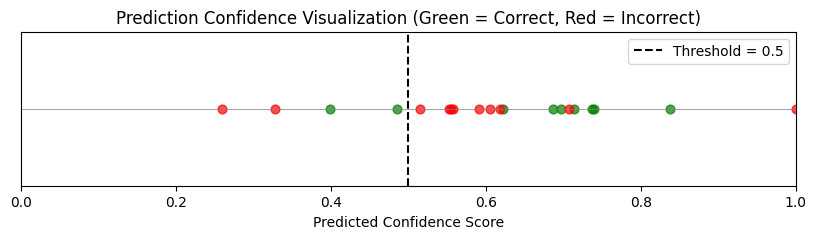

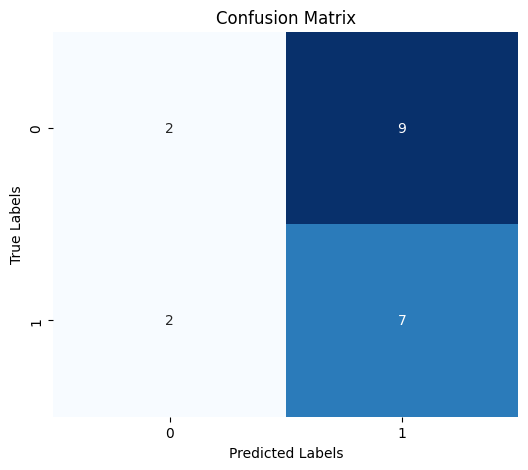

Final Test Accuracy: 0.4500
Final Test Precision: 0.4375
Final Test Recall: 0.7778
Final Test F1-Score: 0.5600


In [6]:
# ======================================================
# 5. Train final model with best parameters
# ======================================================

# --- Standardize features ---
scaler = StandardScaler()
Xtr = scaler.fit_transform(Xtr)
Xte = scaler.transform(Xte)
print(f"Training feature shape: {Xtr.shape}")

# --- Fuzzy C-means clustering on input features only ---
Xtr_T = Xtr.T  # shape: (features, samples)
centers, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data=Xtr_T,
    c=best_params[1],
    m=best_params[0],
    error=0.005,
    maxiter=1000,
    init=None,
    seed=42
)
print("Fuzzy partition coefficient (FPC):", fpc)

# --- Compute sigmas and hard labels ---
sigmas = compute_sigmas(Xtr, centers, u, m)

model = TSK(
    n_inputs=Xtr.shape[1],
    n_rules=best_params[1],
    centers=torch.tensor(centers, dtype=torch.float32),
    sigmas=torch.tensor(sigmas, dtype=torch.float32)
)

Xtr = torch.tensor(Xtr, dtype=torch.float32)
ytr = torch.tensor(ytr, dtype=torch.float32)
Xte = torch.tensor(Xte, dtype=torch.float32)
yte = torch.tensor(yte, dtype=torch.float32)



# Training with ANFIS:
train_hybrid_anfis(model, Xtr, ytr.reshape(-1,1), max_iters=10, gd_epochs=5)

# ======================================================
# Final test evaluation
# ======================================================

evaluate_anfis(model, Xte, yte)